In [575]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from datetime import datetime, timedelta

# Loading the data files and resample to 30 mins intervals

In [576]:
dateparse2 = lambda dates: pd.datetime.strptime(dates, '%m/%d/%y')

dodgers_data = pd.read_csv('dodgers_data.csv',
                          parse_dates=['game_date'],
                          index_col='game_date',
                          date_parser=dateparse2)

In [590]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y %H:%M')

traffic_data = pd.read_csv('traffic_data.csv', 
                           parse_dates=['traffic_time'], 
                           index_col="traffic_time",
                           date_parser=dateparse)

td_df = traffic_data.resample('30T').sum()

no_game = np.empty([1, len(td_df.index)])
no_game.fill("0")
td_df['has_game'] = no_game[0]

inc = range(1, len(td_df.index) + 1)
td_df['inc'] = inc

def get_time(row):
    return pd.Index(row).name.strftime('%H:%M:%S')

def get_date(row):
    return pd.Index(row).name.strftime('%Y-%m-%d')

td_df['time'] = td_df.apply(lambda row: get_time(row), axis=1)
td_df['date'] = td_df.apply(lambda row: get_date(row), axis=1)

# Now, calculate the response variable called 'has_game', it's a boolean value.  0 means there was no game, 1 means there was a game during this time.

In [591]:
interval = 30

In [592]:
for date in td_df.resample('D').index:
    date_str = date.date().strftime('%Y-%m-%d')
    ts_traffic = td_df[date_str:date_str]
                
    if date_str in dodgers_data.index:   
        start_time = dodgers_data[date_str:date_str]['start_time'].values[0]
        end_time = dodgers_data[date_str:date_str]['end_time'].values[0]
        
        start_time_dt = pd.to_datetime(date_str + ' ' + start_time)
        end_time_dt = pd.to_datetime(date_str + ' ' + end_time)
        
        if start_time_dt.minute % interval == 0:
            # perfect, find the next bucket
            start_index = start_time_dt + timedelta(minutes=interval)
        else:
            if start_time_dt.minute / interval == 0:
                # find the closest next interval
                start_index = start_time_dt + timedelta(minutes=(interval - start_time_dt.minute))
            else:
                start_index = start_time_dt + timedelta(minutes=(start_time_dt.minute % interval) + interval)
            
        if end_time_dt.minute % interval == 0:
            # perfect, find the previous bucket
            end_index = end_time_dt - timedelta(minutes=interval)
        else:
            if end_time_dt.minute / interval == 0:
                end_index = end_time_dt + timedelta(minutes=(interval - end_time_dt.minute))
            else:
                end_index = end_time_dt + timedelta(minutes=(end_time_dt.minute % interval) + interval)
                        
        # go through the interval and assign 1 to the row
        for r in td_df[start_index:end_index].iterrows():
            td_df.set_value(r[0], 'has_game', 1)
        

/Users/tingchang/anaconda/envs/ting/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


# Plot for the entire data frame

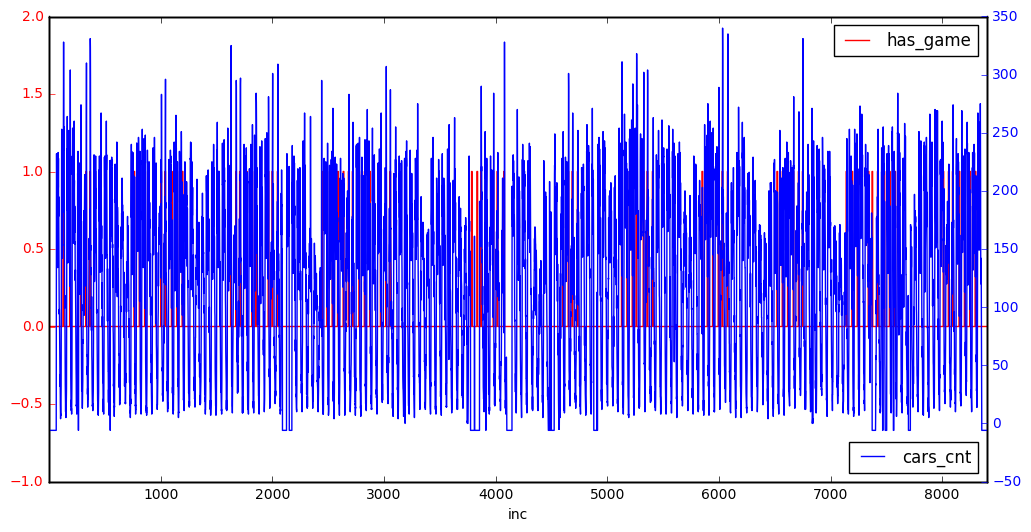

In [593]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

fig.subplots_adjust(right=0.75)
ax.set_ylim(-1, 2)
ax.tick_params(axis='y', colors='red')

td_df.plot(ax=ax, x='inc', y='has_game', legend=True, color='red')
td_df.plot(ax=ax2, x='inc', y='cars_cnt', color='blue', legend=False, secondary_y=True)

plt.legend(loc=4)
plt.tick_params(axis='y', colors='blue')

# 2005-04-30 

In [598]:
def plot_game_cnt(start_date, end_date):
    fig, ax = plt.subplots()
    ax2 = ax.twinx()

    fig.subplots_adjust(right=0.75)
    ax.set_ylim(-1, 2)
    ax.tick_params(axis='y', colors='red')

    td_df[start_date:end_date].plot(ax=ax, x='inc', y='has_game', legend=True, color='red')
    td_df[start_date:end_date].plot(ax=ax2, x='inc', y='cars_cnt', color='blue', legend=False, secondary_y=True)

    plt.legend(loc=4)
    plt.tick_params(axis='y', colors='blue')
    
    td_df[start_date:end_date].plot(x='inc', y='cars_cnt')
    td_df[start_date:end_date].plot(x='inc', y='has_game', ylim=[-1, 2], color='red')

# Only 2005-04-12

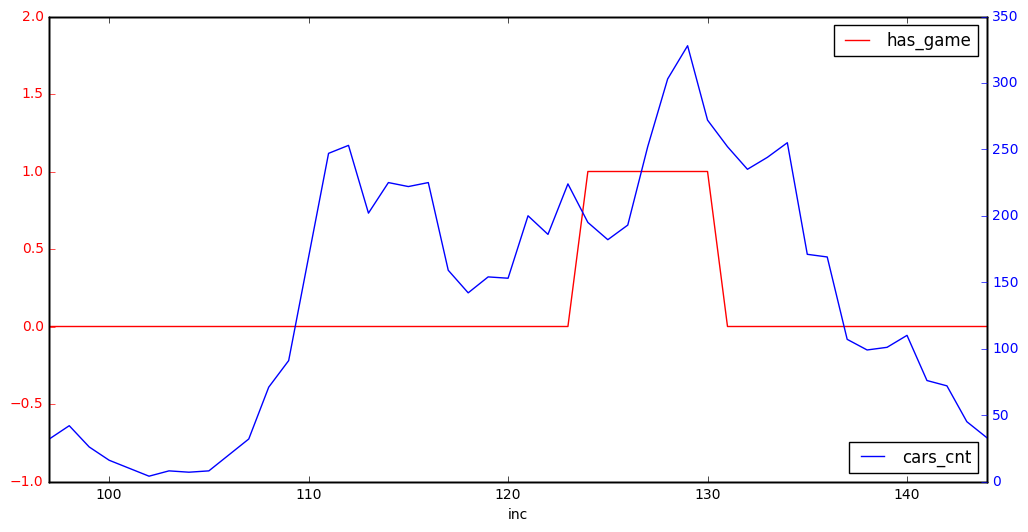

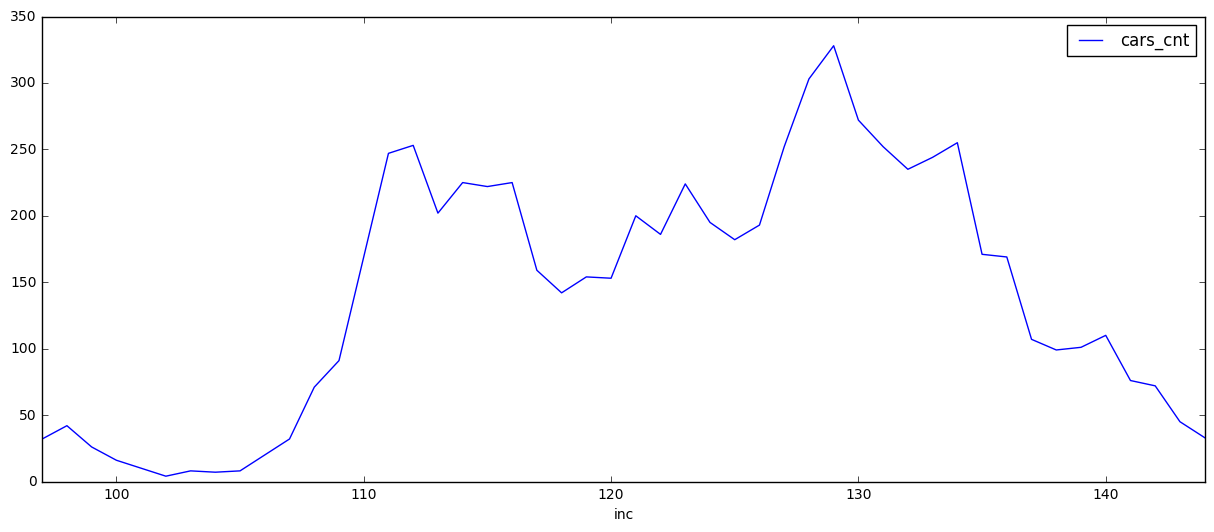

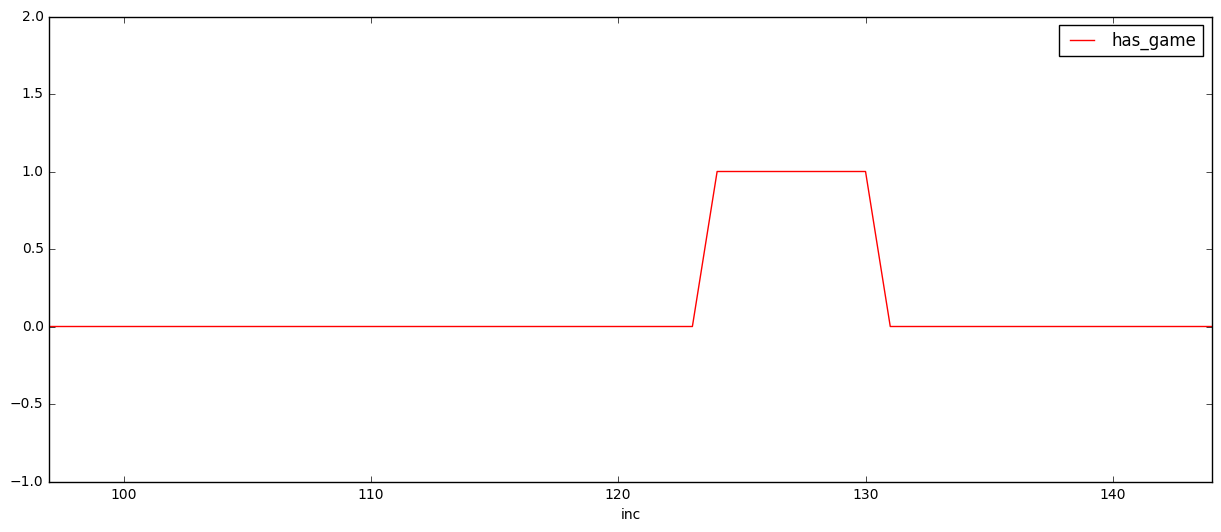

In [604]:
plot_game_cnt("2005-04-12", "2005-04-12")

# First Week of April 2005-4-10 to 2005-04-17

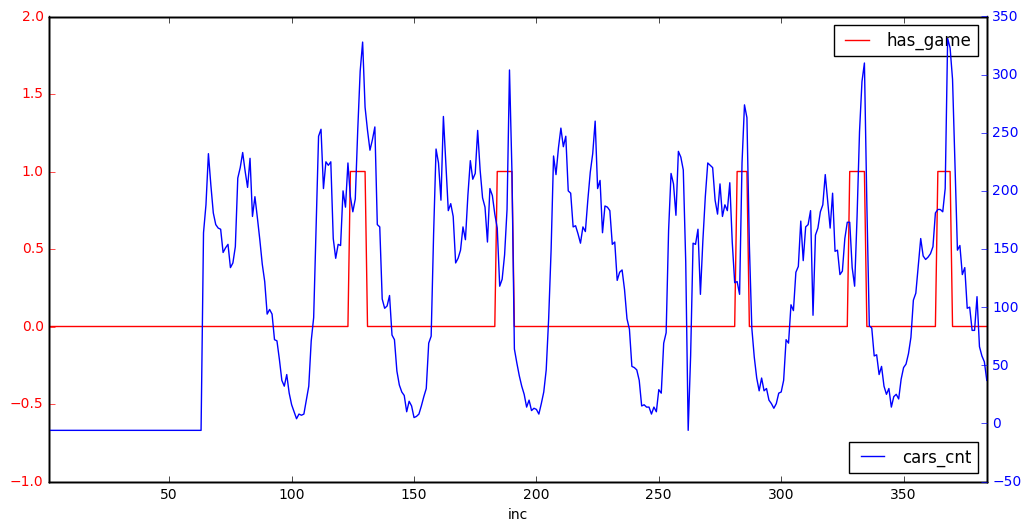

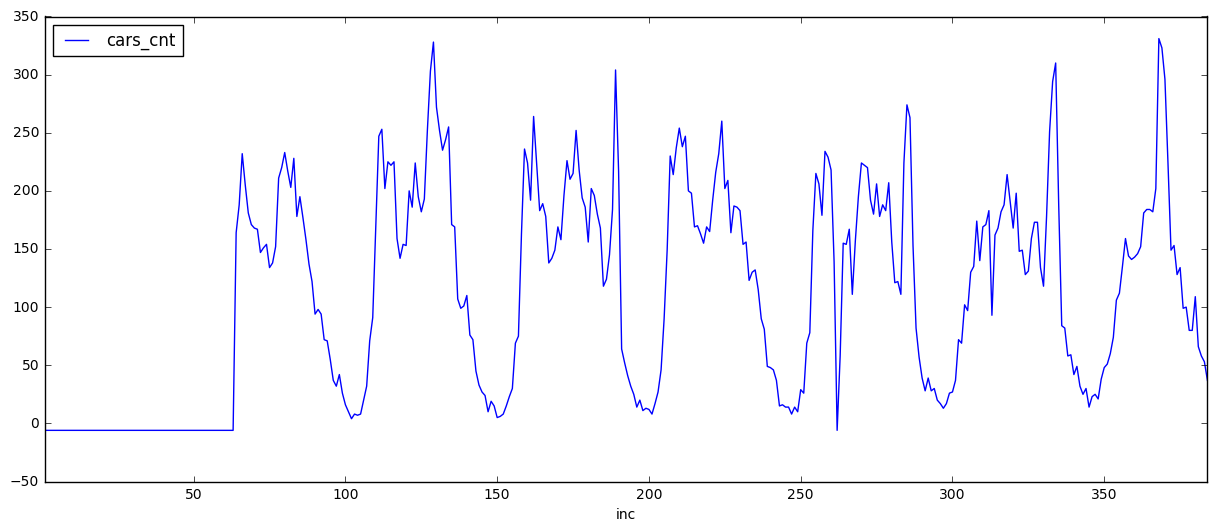

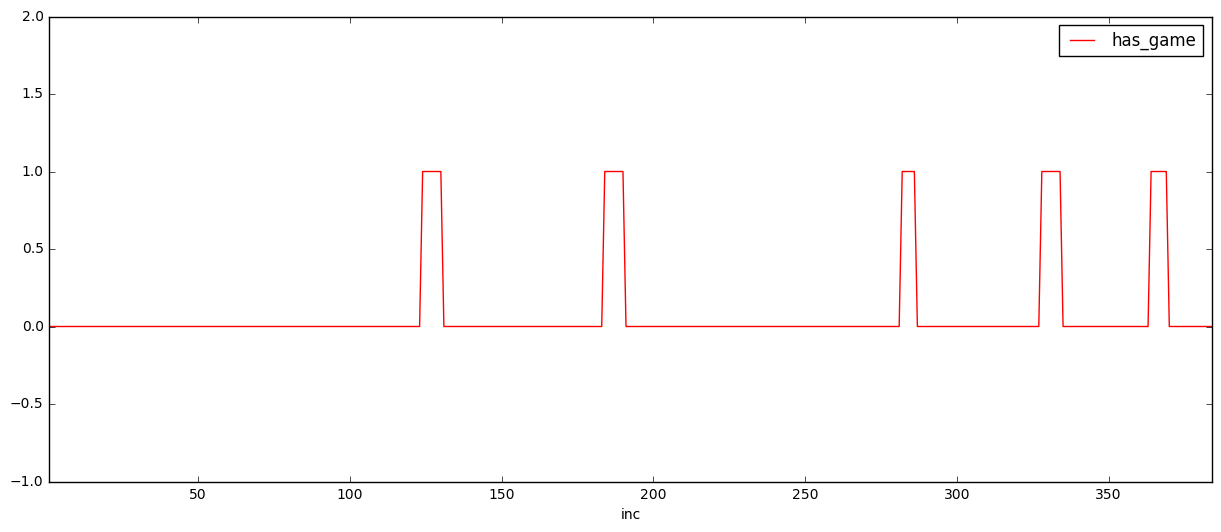

In [605]:
plot_game_cnt("2005-04-01", "2005-04-17")

# Entire April

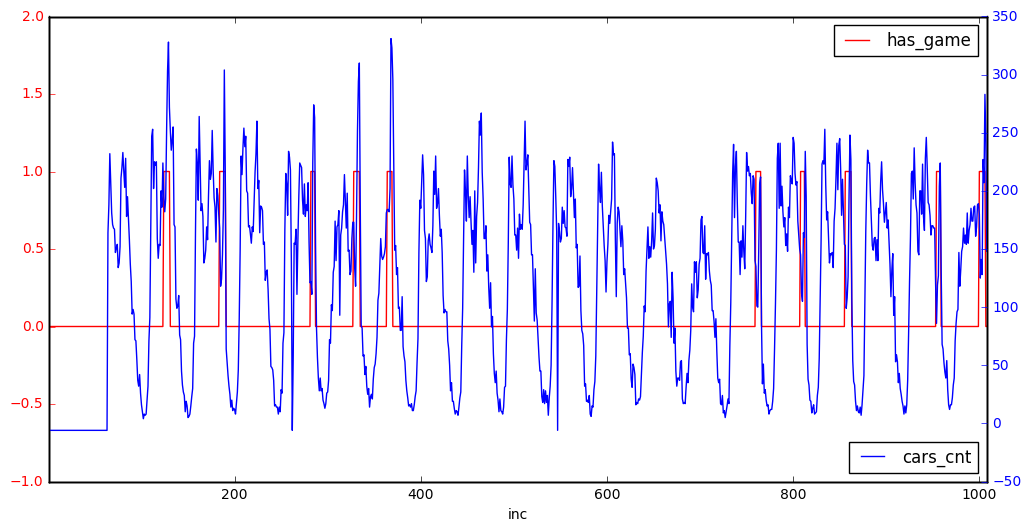

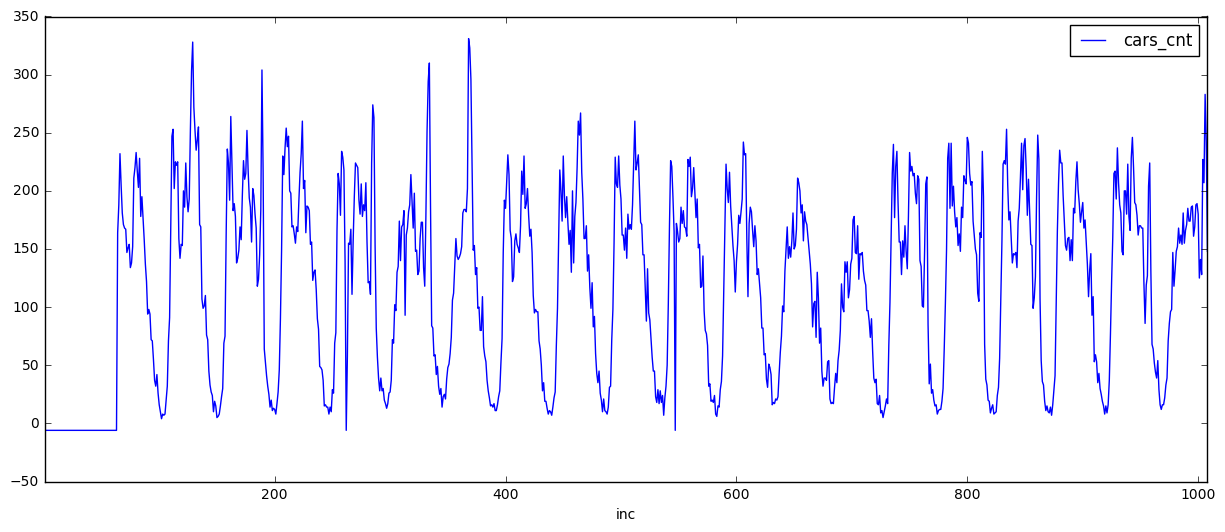

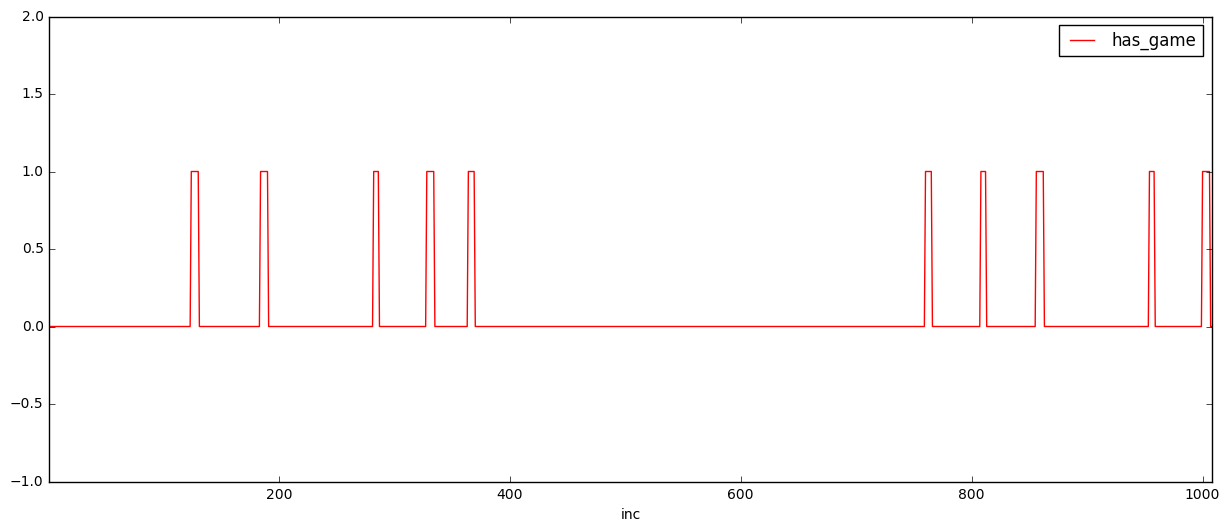

In [603]:
plot_game_cnt(None, "2005-04-30")